In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression #importing only the necesary scikit-learn section
from sklearn.model_selection import train_test_split #importing only the necesary scikit-learn section

#Loading np array to access data
data = np.load('proyecto_training_data.npy')
#Using pandas dataframe structure to compare
df = pd.DataFrame(data,columns=['SalePrice','OverallQual','firstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
columns=['SalePrice','OverallQual','firstFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
#spliting np array into independent dimensions and dependent dimension
SalePrice= data[ :,0] #Y dependent variable 
OverallQual= data[ :,1] #X1
firstFlrSF= data[ :,2] #X2
TotRmsAbvGrd= data[ :,3] #X3
YearBuilt= data[ :,4] #X4

#Descriptive Statistcs

In [65]:
df.head()

,SalePrice,OverallQual,firstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
df.describe()

,SalePrice,OverallQual,firstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [15]:
#limpiando datos faltantes en  LotFrontage
data = np.nan_to_num(data,nan=70.049958) #Mean of LotFrontage (Only one missing data)
LotFrontage= data[ :,5] #X5

X₁ = OverallQual

x̅₁= 6.0993150684931505 σ₁= 1.3825228366585953 Maxₓ₁= 10.0 minₓ₁= 1.0 rangoₓ₁= 9.0 



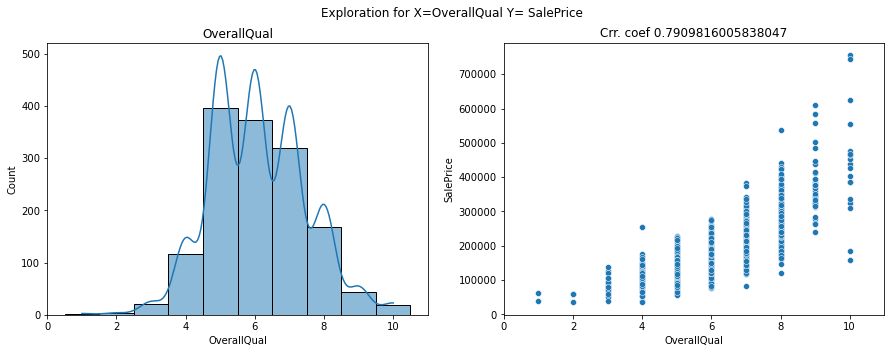

In [8]:
print('X\u2081 = OverallQual\n\n'
'x̅\u2081=', OverallQual.mean(),
'σ\u2081=', OverallQual.std(),
'Max\u2093\u2081=', OverallQual.max(),
'min\u2093\u2081=', OverallQual.min(),
'rango\u2093\u2081=', OverallQual.ptp(),
'\n')

#Calculating correlation coefficient
rho1_matrix = np.corrcoef(OverallQual, SalePrice)
rho1 = rho1_matrix[0,1]

#Creating Graphs 
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Exploration for X=OverallQual Y= SalePrice')

#replacing distplot for histplot as displot is deprecated and histplot allows for use of axis (placing charts side by side)
sns.histplot( data=OverallQual,discrete=True,kde=True, ax=axes[0])
axes[0].set_title('OverallQual')
axes[0].set_xlabel('OverallQual')

sns.scatterplot(ax=axes[1], x=OverallQual, y=SalePrice)
axes[1].set_title(f'Crr. coef {rho1}')
axes[1].set_xlabel('OverallQual')
axes[1].set_ylabel('SalePrice')

plt.show()

X₂ = firstFlrSF

x̅₂= 1162.626712328767 σ₂= 386.45532230228963 Maxₓ₂= 4692.0 minₓ₂= 334.0 rangoₓ₂= 4358.0 



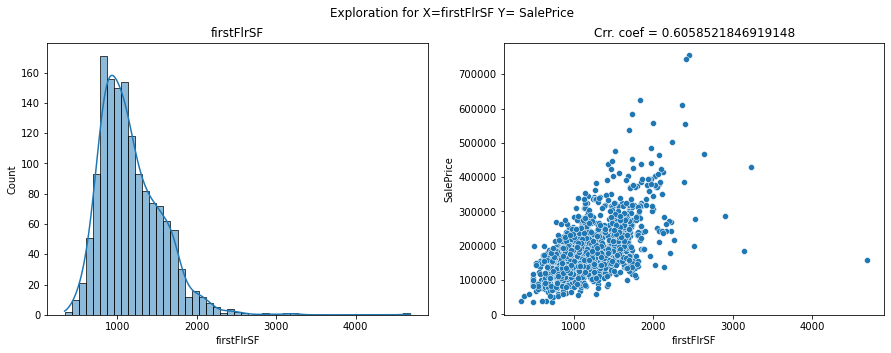

In [119]:
print('X\u2082 = firstFlrSF\n\n'
'x̅\u2082=', firstFlrSF.mean(),
'σ\u2082=', firstFlrSF.std(),
'Max\u2093\u2082=', firstFlrSF.max(),
'min\u2093\u2082=', firstFlrSF.min(),
'rango\u2093\u2082=', firstFlrSF.ptp(),
'\n')

#Calculating correlation coefficient
rho2_matrix = np.corrcoef(firstFlrSF, SalePrice)
rho2 = rho2_matrix[0,1]

#Creating Graphs 
fig, axes = plt.subplots(1, 2,  figsize=(15,5))
fig.suptitle('Exploration for X=firstFlrSF Y= SalePrice')

#replacing distplot for histplot as displot is deprecated and histplot allows for use of axis
sns.histplot( data=firstFlrSF,kde=True, ax=axes[0])
axes[0].set_title('firstFlrSF')
axes[0].set_xlabel('firstFlrSF')

sns.scatterplot(ax=axes[1], x=firstFlrSF, y=SalePrice)
axes[1].set_title(f'Crr. coef = {rho2}')
axes[1].set_xlabel('firstFlrSF')
axes[1].set_ylabel('SalePrice')

plt.show()

X₃ = TotRmsAbvGrd

x̅₃= 6.517808219178082 σ₃= 1.624836553698191 Maxₓ₃= 14.0 minₓ₃= 2.0 rangoₓ₃= 12.0 



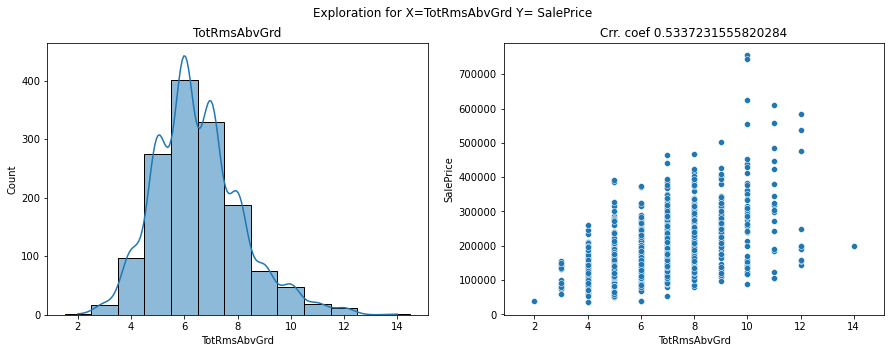

In [9]:
print('X\u2083 = TotRmsAbvGrd\n\n'
'x̅\u2083=', TotRmsAbvGrd.mean(),
'σ\u2083=', TotRmsAbvGrd.std(),
'Max\u2093\u2083=', TotRmsAbvGrd.max(),
'min\u2093\u2083=', TotRmsAbvGrd.min(),
'rango\u2093\u2083=', TotRmsAbvGrd.ptp(),
'\n')

#Calculating correlation coefficient
rho3_matrix = np.corrcoef(TotRmsAbvGrd, SalePrice)
rho3 = rho3_matrix[0,1]

#Creating Graphs 
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Exploration for X=TotRmsAbvGrd Y= SalePrice')

#replacing distplot for histplot as displot is deprecated and histplot allows for use of axis
sns.histplot( data=TotRmsAbvGrd,discrete=True,kde=True, ax=axes[0])
axes[0].set_title('TotRmsAbvGrd')
axes[0].set_xlabel('TotRmsAbvGrd')

sns.scatterplot(ax=axes[1], x=TotRmsAbvGrd, y=SalePrice)
axes[1].set_title(f'Crr. coef {rho3}')
axes[1].set_xlabel('TotRmsAbvGrd')
axes[1].set_ylabel('SalePrice')

plt.show()

X₄ = YearBuilt

 x̅₄= 1971.267808219178 σ₄= 30.192558810489448 Maxₓ₄= 2010.0 minₓ₄= 1872.0 rangoₓ₄= 138.0 



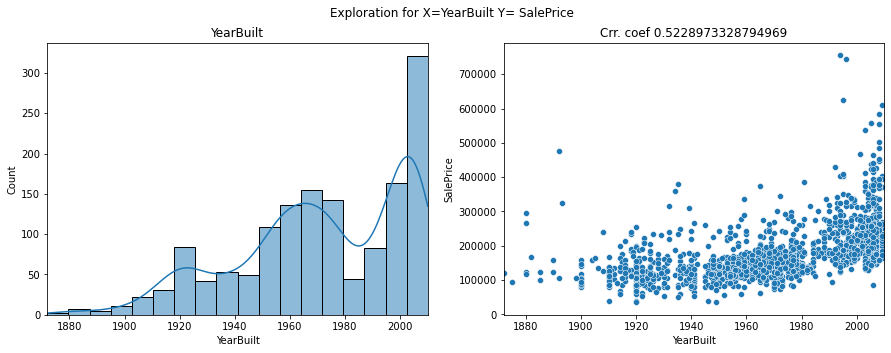

In [121]:
print('X\u2084 = YearBuilt\n\n',
'x̅\u2084=', YearBuilt.mean(),
'σ\u2084=', YearBuilt.std(),
'Max\u2093\u2084=', YearBuilt.max(),
'min\u2093\u2084=', YearBuilt.min(),
'rango\u2093\u2084=', YearBuilt.ptp(),
'\n')

#Calculating correlation coefficient
rho4_matrix = np.corrcoef(YearBuilt, SalePrice)
rho4 = rho4_matrix[0,1]


#Creating Graphs 
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Exploration for X=YearBuilt Y= SalePrice')

#replacing distplot for histplot as displot is deprecated and histplot allows for use of axis
sns.histplot( data=YearBuilt,kde=True, ax=axes[0])
axes[0].set_title('YearBuilt')
axes[0].set_xlabel('YearBuilt')
axes[0].set_xlim([YearBuilt.min(), YearBuilt.max()])

sns.scatterplot(ax=axes[1], x=YearBuilt, y=SalePrice)
axes[1].set_title(f'Crr. coef {rho4}')
axes[1].set_xlabel('YearBuilt')
axes[1].set_ylabel('SalePrice')
axes[1].set_xlim([YearBuilt.min(), YearBuilt.max()])

plt.show()

X₅ = LotFrontage

x̅₅= 70.04995830273974 σ₅= 22.0164789232215 Maxₓ₅= 313.0 minₓ₅= 21.0 rangoₓ₅= 292.0 



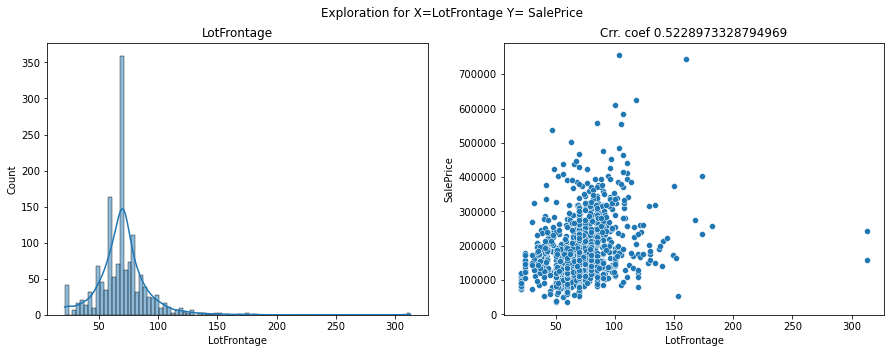

In [16]:
print('X\u2085 = LotFrontage\n\n'
'x̅\u2085=', LotFrontage.mean(),
'σ\u2085=', LotFrontage.std(),
'Max\u2093\u2085=', LotFrontage.max(),
'min\u2093\u2085=', LotFrontage.min(),
'rango\u2093\u2085=', LotFrontage.ptp(),
'\n')

#Calculating correlation coefficient
rho5_matrix = np.corrcoef(YearBuilt, SalePrice)
rho5 = rho5_matrix[0,1]

#Creating Graphs 
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Exploration for X=LotFrontage Y= SalePrice')

#replacing distplot for histplot as displot is deprecated and histplot allows for use of axis
sns.histplot( data=LotFrontage,kde=True, ax=axes[0])
axes[0].set_title('LotFrontage')
axes[0].set_xlabel('LotFrontage')

sns.scatterplot(ax=axes[1], x=LotFrontage, y=SalePrice)
axes[1].set_title(f'Crr. coef {rho5}')
axes[1].set_xlabel('LotFrontage')
axes[1].set_ylabel('SalePrice')

plt.show()

#Análisis de Correlación
Basado en el análisis de correlación se elegirán las variables para entrenar modelo 

In [23]:
correlation = []
for i in range(1,len(columns)):
    correlation.append(df[columns[0]].corr(df[columns[i]]))
corr = pd.Series(correlation, name=columns[0], index=columns[1:])
corr.to_frame().T

,OverallQual,firstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,0.790982,0.605852,0.533723,0.522897,0.351799


#Linear Regresion predicton of Y =  Sale Price for X_1 = Overall Quality and X_2 = First Floor Square Footage

In [67]:
#Using np to split for 80/20 split
train,test = data[:1168,:], data[1168:,:]
print( 'training=' ,train.shape)
print( 'testing=' ,test.shape)

training= (1168, 6)
testing= (292, 6)


##Linear Regresion model

In [113]:

def linReg(x,y,epochs,imprimir_error_cada,lr):
    m= 0.0 #Starting M with float zero
    b = 0.0 #Starting B with float zeros
    params=np.array([m,b]) 
    errors=np.zeros(epochs) #n_size of param = epochs
    model_results={} #Storing results
    x_reshape = x.reshape(len(x),1)
    observation = np.insert(x_reshape,1,np.ones_like(x),axis=1) #Adds 1 to the right of x variables

    for i in range(epochs):
        yhat= np.dot(observation,params) # y_hat = mx+b
        errors[i]=(np.average((yhat-y)**2)/2) #[i] to store the error on each iteration
        gradients =np.dot(yhat-y,observation)/len(y)
        params -=(lr*gradients)
        model[i]=params.copy()

        if ((i+1) % imprimir_error_cada) ==0:
            print(f"Error de Iteración {i+1}= ",errors[i])
    return(model_results,errors)

##Error Graph Function

In [114]:
def errorGraph (errors):
    x=range(0,len(errors))
    y=errors
    fig = plt.figure()
    ax=fig.add_subplot(1,1,1)

    ax.grid()
    ax.plot(x,errors,label="training losses")
    
    ax.legend()
    ax.set_title("Losses")
    ax.set_xlabel("iteration")
    ax.set_ylabel("errors")



##Model Graph  function

In [115]:
def trainModelGraph(x,y,params,n):
    
    #filas_plots = -((len(params)//n)//-2)

    #f, axes = plt.subplots(filas_plots,2,sharex=False,figsize=(15,20))
    f, axes = plt.subplots(10,2,sharex=False,figsize=(15,20))

    x_reshape = x.reshape(len(x),1)
    xx = np.insert(x_reshape,1,np.ones_like(x),axis=1)
    pos = 1

    for i in range(n-1,len(model),n): #matching python's range from 0 and not 1
         yhat= np.dot(xx,params) # y_hat = mx+b
         m = round(params[i][0],2)
         b = round(params[i][1],2)

         #plt.subplot(filas_plots,2,pos)
         plt.subplot(10,2,pos)
         pos+=1

         plt.scatter(X,y)
         plt.plot(x,y_hat)

         plt.title(f"iteración #{i+1}, m={m} b={b}")
    plt.show



##Linear Regresion predicton of Y = Sale Price for X_1 = Overall Quality


Error de Iteración 100=  9529508397.186691
Error de Iteración 200=  5038410635.515043
Error de Iteración 300=  3026467600.1106815
Error de Iteración 400=  2125076747.3682773
Error de Iteración 500=  1721164452.287196
Error de Iteración 600=  1540100749.0567882
Error de Iteración 700=  1458863515.8884382
Error de Iteración 800=  1422344263.720589
Error de Iteración 900=  1405856817.9830377
Error de Iteración 1000=  1398342860.2789443


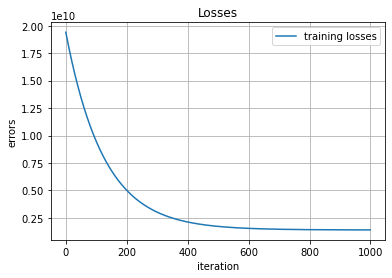

In [116]:
epochs = 1000
error = 100
lr = 0.0001
model_results,errors =linReg(train[:,1],train[:,0],epochs,error,lr)
errorGraph (errors)
#trainModelGraph(train[:,1],train[:,0],model_results,100)


In [107]:
x1_reshaped = train[:,1].reshape(-1,1)
y_reshaped = train[:,0].reshape(-1,1)

regressor =LinearRegression()
regressor.fit(x1_reshaped, y_reshaped)

LinearRegression()